In [1]:
# import packages
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# define data directory 
# (replace with your data directory file path)
data_dir = '/Volumes/Elements/datasets/'
data_dir = '/Users/Wilson/OneDrive - Colorado School of Mines/0-data/'

In [ ]:
# download BedMachine netcdf file from: 
# https://nsidc.org/data/NSIDC-0756 
# more info: https://sites.uci.edu/morlighem/bedmachine-antarctica/
# relocate download to data_dir

In [2]:
# open Bedmachine netcdf dataset using xarray
bm_xr = xr.open_dataset(data_dir + 'beds/BedMachine/BedMachineAntarctica_2020-07-15_v02.nc')
#bm_xr # display file metadata

In [6]:
# define bounding box of interest in polar stereographic coordinates
# (here Slessor Glacier, East Antarctica)
xmin=-600000
ymin=870000
xmax=-180000
ymax=1290000

# select BedMachine data within bounding box, assign to variable
slessor = bm_xr.where((bm_xr.x > xmin) & (bm_xr.x < xmax) & (bm_xr.y > ymin) & (bm_xr.y < ymax), drop=True)

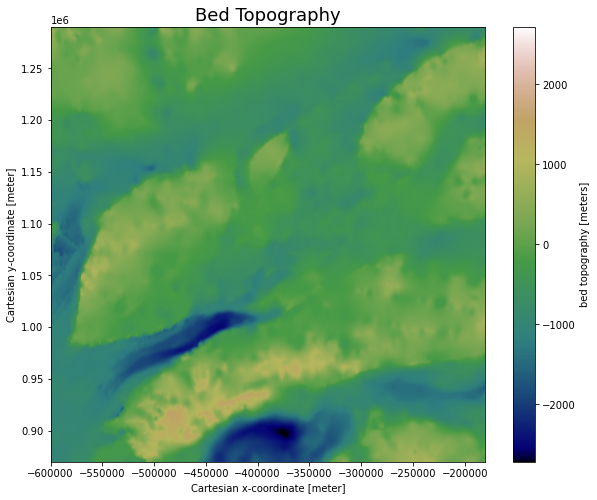

In [32]:
# plot bed elevation 
fig, ax = plt.subplots(figsize=(10, 8)) # specific fig and axes objects, figsize
ax.set_aspect('equal') # maintain equal ratio of y-unit to x-unit
ax.set_xlim(xmin,xmax) # define plotting limits based on bounding box
ax.set_ylim(ymin,ymax)
slessor.plot.scatter(x='x',y='y',hue='bed',cmap='gist_earth') # plot subsetted data
plt.title('Bed Topography',fontsize=18);

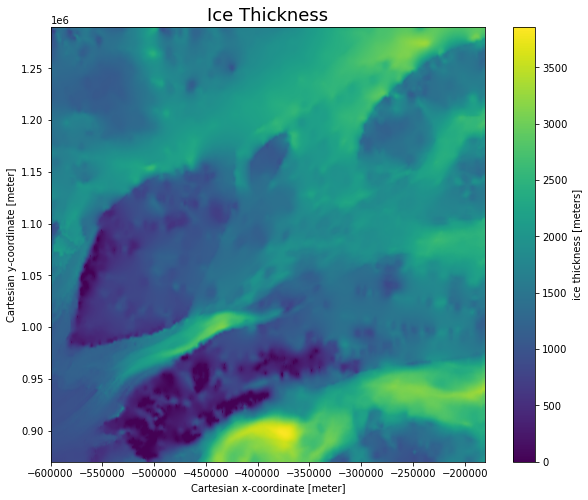

In [33]:
# plot ice thickness
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_aspect('equal')
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
slessor.plot.scatter(x='x',y='y',hue='thickness',cmap='viridis')
plt.title('Ice Thickness',fontsize=18);

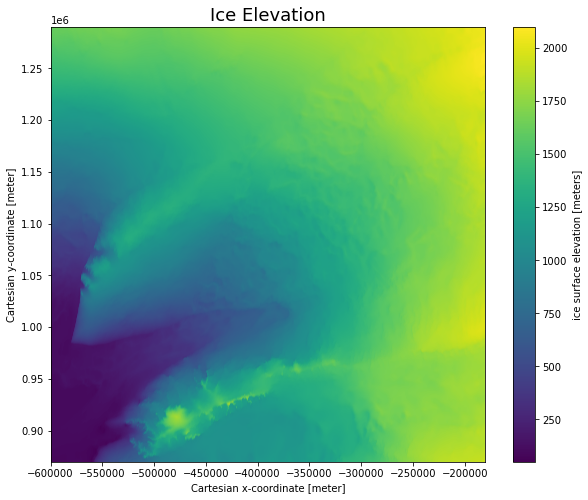

In [34]:
# plot ice elevation
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_aspect('equal')
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
slessor.plot.scatter(x='x',y='y',hue='surface',cmap='viridis')
plt.title('Ice Elevation',fontsize=18);

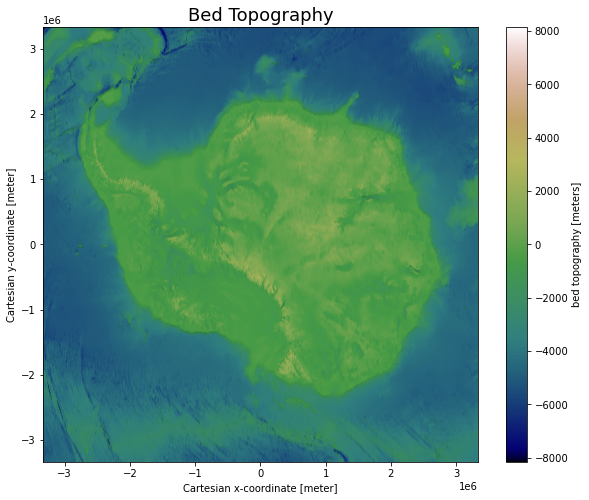

In [65]:
# plot bed elevation, continent wide
# (continental-scale plot will take awhile to load)
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_aspect('equal')
ax.set_xlim(np.min(bm_xr.x.values),np.max(bm_xr.x.values))
ax.set_ylim(np.min(bm_xr.y.values),np.max(bm_xr.y.values))
bm_xr.plot.scatter(x='x',y='y',hue='bed',cmap='gist_earth')
plt.title('Bed Topography',fontsize=18);

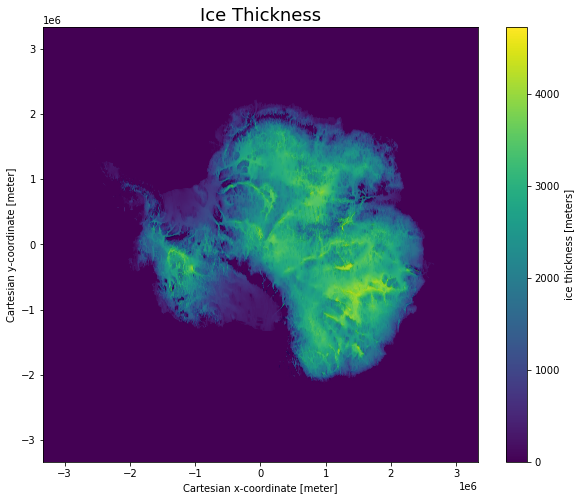

In [66]:
# plot ice thickness, continent wide
# (continental-scale plot will take awhile to load)
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_aspect('equal')
ax.set_xlim(np.min(bm_xr.x.values),np.max(bm_xr.x.values))
ax.set_ylim(np.min(bm_xr.y.values),np.max(bm_xr.y.values))
bm_xr.plot.scatter(x='x',y='y',hue='thickness',cmap='viridis')
plt.title('Ice Thickness',fontsize=18);

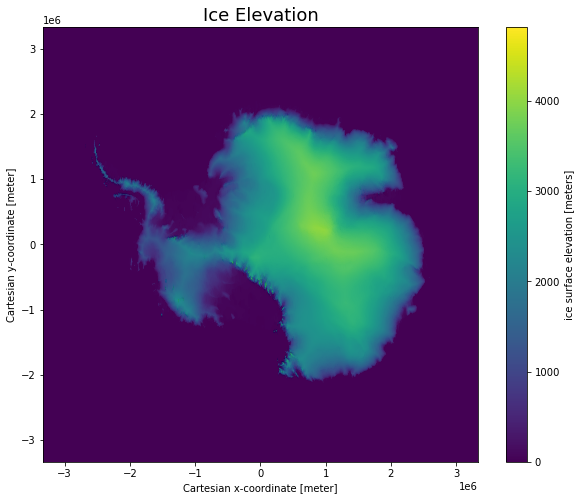

In [67]:
# plot ice elevation, continent wide
# (continental-scale plot will take awhile to load)
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_aspect('equal')
ax.set_xlim(np.min(bm_xr.x.values),np.max(bm_xr.x.values))
ax.set_ylim(np.min(bm_xr.y.values),np.max(bm_xr.y.values))
bm_xr.plot.scatter(x='x',y='y',hue='surface',cmap='viridis')
plt.title('Ice Elevation',fontsize=18);

In [3]:
# calculate hydropotential (following Fricker and others, 2014 eqn. 1, which follows Shreve 1972)
# hydropotential = Zb + (rho-ice/rho-water)*Zsurf
# assign as new xarray dataset variable that replaces old
bm_xr = bm_xr.assign(hydropotential_MPa=bm_xr['bed'] + (917/1000)*bm_xr['surface'])

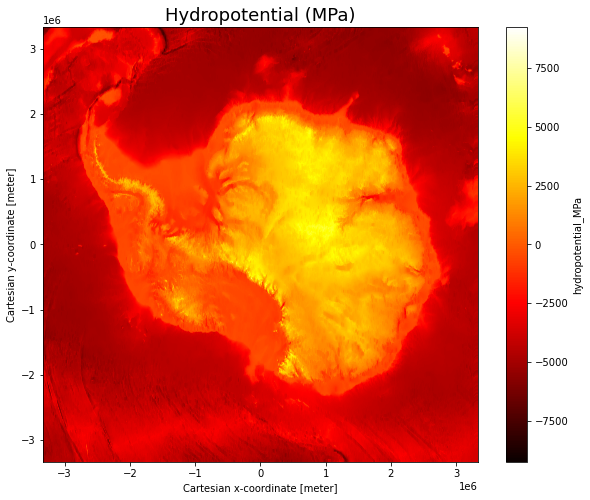

In [4]:
# plot hydropotential, continent wide
# (continental-scale plot will take a while to load)
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_aspect('equal')
ax.set_xlim(np.min(bm_xr.x.values),np.max(bm_xr.x.values))
ax.set_ylim(np.min(bm_xr.y.values),np.max(bm_xr.y.values))
bm_xr.plot.scatter(x='x',y='y',hue='hydropotential_MPa',cmap='hot')
plt.title('Hydropotential (MPa)',fontsize=18);

In [ ]:
# references
# Fricker, H. A., Carter, S. P., Bell, R. E., & Scambos, T. (2014). Active lakes of Recovery Ice Stream, East Antarctica: a bedrock-controlled subglacial hydrological system. Journal of Glaciology, 60(223), 1015–1030. https://doi.org/10.3189/2014JoG14J063
# Shreve, R. L. (1972). Movement of Water in Glaciers. Journal of Glaciology, 11(62), 205–214. https://doi.org/10.3189/S002214300002219X